In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
ds=pd.read_csv(r"C:\Users\sojwa\Downloads\archive\Position_Salaries.csv")

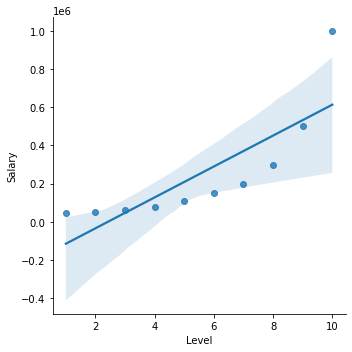

In [5]:
sb.lmplot(x='Level',y='Salary',data=ds)

In [6]:
ds

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=ds['Level']
y=ds['Salary']


In [9]:
X = X.values.reshape(-1, 1)

In [10]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.3 ,random_state=42)

In [11]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7, 1)
Shape of y_train: (7,)
Shape of X_test: (3, 1)
Shape of y_test: (3,)


In [12]:
X_train

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]], dtype=int64)

In [13]:
X_test

array([[9],
       [2],
       [6]], dtype=int64)

In [14]:
y_train

0      45000
7     300000
2      60000
9    1000000
4     110000
3      80000
6     200000
Name: Salary, dtype: int64

In [15]:
y_test

8    500000
1     50000
5    150000
Name: Salary, dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression #importing linearRegree algo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
model1=LinearRegression()


In [18]:
model1.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=model1.predict(X_test)

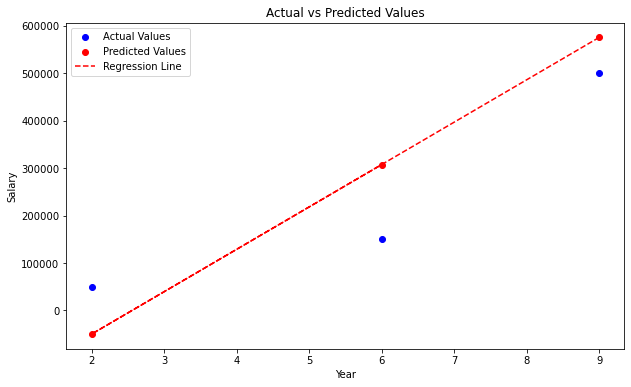

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')  # Actual values
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')  # Predicted values
plt.plot(X_test, y_pred, color='red', linestyle='--', label='Regression Line')  # Regression line
plt.title('Actual vs Predicted Values')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [21]:

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


In [22]:
print(f"Mean Squared Error:{mse}")
print(f"R2 Score: {r2}")

Mean Squared Error:13447704524.474731
R2 Score: 0.6387183859096339


In [23]:
model1.predict([[6.5]])

array([352048.26732673])

In [24]:
#Therefore the error is very high and we cannot get good results with linear Regression 

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly=PolynomialFeatures(degree=3)

In [27]:
#x_poly=poly.fit_transform(X)       #Transforms x in the degree making it non-linear equation
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [28]:
reg2=LinearRegression()

In [29]:
reg2.fit(X_train_poly,y_train)

LinearRegression()

In [30]:
reg2.predict(poly.fit_transform([[6.5]])) #compare 45th cell 

array([132461.20101472])

In [31]:
y_pred = reg2.predict(X_test_poly)

NameError: name 'x' is not defined

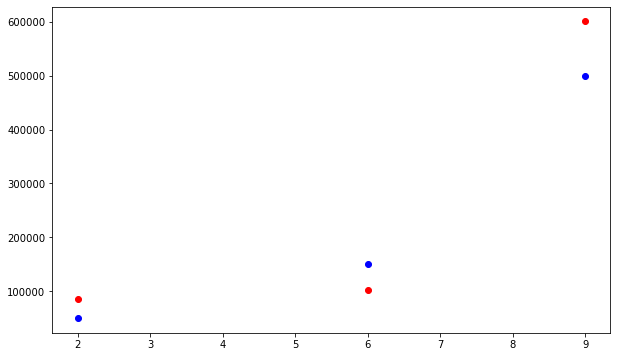

In [32]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')  # Actual values
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')  # Predicted values
plt.plot(x, y_pred, color='blue')


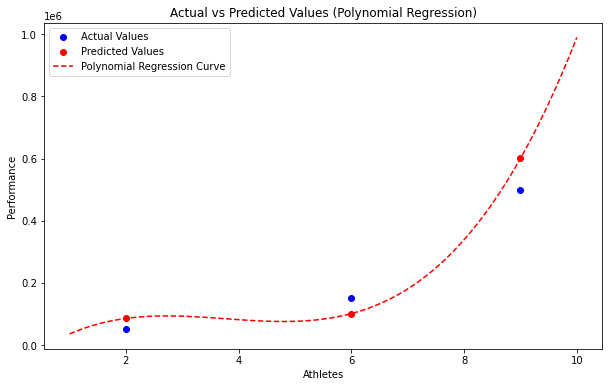

In [33]:
# To plot a smooth curve, use the entire range of X values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')  # Actual values
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')  # Predicted values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Create a smooth range of X values
X_range_poly = poly.transform(X_range)  # Transform the X range using the same polynomial transformation
y_range_pred = reg2.predict(X_range_poly)  # Predict using the polynomial model

# Plot the polynomial regression curve
plt.plot(X_range, y_range_pred, color='red', linestyle='--', label='Polynomial Regression Curve')

# Add title and labels
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.xlabel('Athletes')
plt.ylabel('Performance')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [38]:

r2=r2_score(y_test,y_pred)


In [39]:

r2

0.8765474238100401